In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 나이와, 성별에 따른 확진자

## 성별

In [2]:
timegender = pd.read_csv('./covid/timegender.csv')

timegender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


### 월별로 나누기

In [3]:
timegender['date'] = pd.to_datetime(timegender['date'])

timegender['year'] = timegender['date'].dt.year #연도
timegender['month'] = timegender['date'].dt.month #월
timegender['day'] = timegender['date'].dt.day #일

In [4]:
timegender.head()

,date,time,sex,confirmed,deceased,year,month,day
0,2020-03-02,0,male,1591,13,2020,3,2
1,2020-03-02,0,female,2621,9,2020,3,2
2,2020-03-03,0,male,1810,16,2020,3,3
3,2020-03-03,0,female,3002,12,2020,3,3
4,2020-03-04,0,male,1996,20,2020,3,4


### 일일 확진자 추가

In [5]:
daliy_list = []
for key in timegender['sex'].unique():
    diff_num = timegender[timegender['sex'] == key]['confirmed'].diff()
    
    daliy_list.append(diff_num)
    
timegender['daily_confirmed'] = pd.concat(daliy_list)

In [6]:
timegender = timegender.fillna(0)
timegender.head()

,date,time,sex,confirmed,deceased,year,month,day,daily_confirmed
0,2020-03-02,0,male,1591,13,2020,3,2,0.0
1,2020-03-02,0,female,2621,9,2020,3,2,0.0
2,2020-03-03,0,male,1810,16,2020,3,3,219.0
3,2020-03-03,0,female,3002,12,2020,3,3,381.0
4,2020-03-04,0,male,1996,20,2020,3,4,186.0


<AxesSubplot:xlabel='month', ylabel='daily_confirmed'>

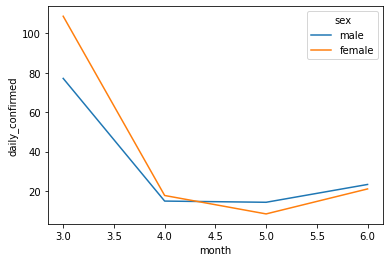

In [7]:
sns.lineplot(x="month", y="daily_confirmed", hue="sex", ci=None, data=timegender)

<AxesSubplot:xlabel='month', ylabel='daily_confirmed'>

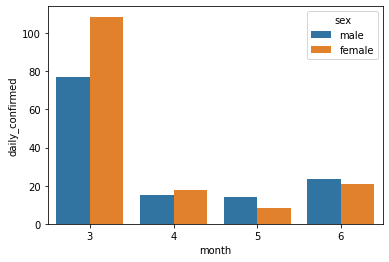

In [8]:
sns.barplot(x="month", y="daily_confirmed", hue="sex", ci=None, data=timegender)

## 나이

In [9]:
timeage = pd.read_csv('./covid/TimeAge.csv')

timeage.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


### 월별로 나누기

In [10]:
timeage['date']

0       2020-03-02
1       2020-03-02
2       2020-03-02
3       2020-03-02
4       2020-03-02
           ...    
1084    2020-06-30
1085    2020-06-30
1086    2020-06-30
1087    2020-06-30
1088    2020-06-30
Name: date, Length: 1089, dtype: object

In [11]:
timeage['date'] = pd.to_datetime(timeage['date'])

In [12]:
timeage['year'] = timeage['date'].dt.year #연도
timeage['month'] = timeage['date'].dt.month #월
timeage['day'] = timeage['date'].dt.day #일

In [13]:
timeage.head()

,date,time,age,confirmed,deceased,year,month,day
0,2020-03-02,0,0s,32,0,2020,3,2
1,2020-03-02,0,10s,169,0,2020,3,2
2,2020-03-02,0,20s,1235,0,2020,3,2
3,2020-03-02,0,30s,506,1,2020,3,2
4,2020-03-02,0,40s,633,1,2020,3,2


### 일일 확진자 컬럼 추가

In [14]:
daliy_list = []
for key in timeage['age'].unique():
    diff_num = timeage[timeage['age'] == key]['confirmed'].diff()
    
    daliy_list.append(diff_num)
    
timeage['daily_confirmed'] = pd.concat(daliy_list)

In [15]:
timeage.head(20)

,date,time,age,confirmed,deceased,year,month,day,daily_confirmed
0,2020-03-02,0,0s,32,0,2020,3,2,NaN
1,2020-03-02,0,10s,169,0,2020,3,2,NaN
2,2020-03-02,0,20s,1235,0,2020,3,2,NaN
3,2020-03-02,0,30s,506,1,2020,3,2,NaN
4,2020-03-02,0,40s,633,1,2020,3,2,NaN
5,2020-03-02,0,50s,834,5,2020,3,2,NaN
6,2020-03-02,0,60s,530,6,2020,3,2,NaN
7,2020-03-02,0,70s,192,6,2020,3,2,NaN
8,2020-03-02,0,80s,81,3,2020,3,2,NaN
9,2020-03-03,0,0s,34,0,2020,3,3,2.0


In [16]:
timeage = timeage.fillna(0)

In [17]:
timeage['age'].unique()

array(['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'],
      dtype=object)

(0.0, 50.0)

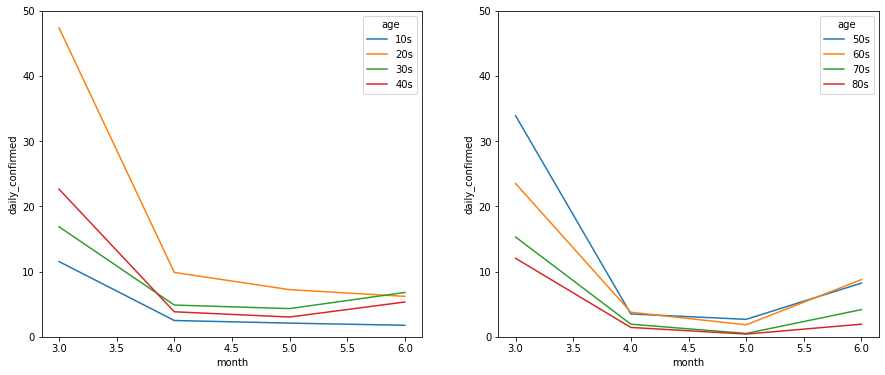

In [18]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,6))

sns.lineplot(x="month", y="daily_confirmed", hue="age", ax = axes[0], ci=None,
             data=timeage[(timeage['age'] == '10s') | (timeage['age'] == '20s') | (timeage['age'] == '30s') | (timeage['age'] == '40s')])
axes[0].set_ylim(0,50)

sns.lineplot(x="month", y="daily_confirmed", hue="age", ax = axes[1], ci=None,
             data=timeage[(timeage['age'] == '50s') | (timeage['age'] == '60s') | (timeage['age'] == '70s') | (timeage['age'] == '80s')])
axes[1].set_ylim(0,50)

(0.0, 50.0)

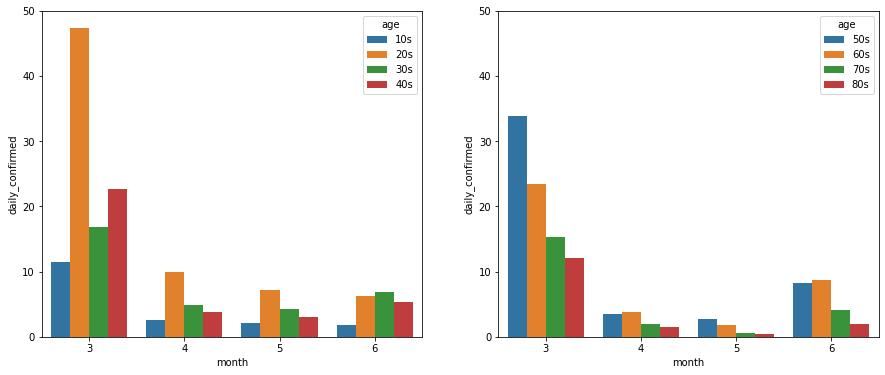

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,6))

sns.barplot(x="month", y="daily_confirmed", hue="age", ax = axes[0], ci=None,
             data=timeage[(timeage['age'] == '10s') | (timeage['age'] == '20s') | (timeage['age'] == '30s') | (timeage['age'] == '40s')])
axes[0].set_ylim(0,50)

sns.barplot(x="month", y="daily_confirmed", hue="age", ax = axes[1], ci=None,
             data=timeage[(timeage['age'] == '50s') | (timeage['age'] == '60s') | (timeage['age'] == '70s') | (timeage['age'] == '80s')])
axes[1].set_ylim(0,50)

## 10대 20대는 지속적으로 줄어들고, 30대 이상은 6월에 다시 증가하는 추세가 있다.

## 확진자 수가 많은 3월의 일일 확진자수는 어떻게 될까?

(0.0, 150.0)

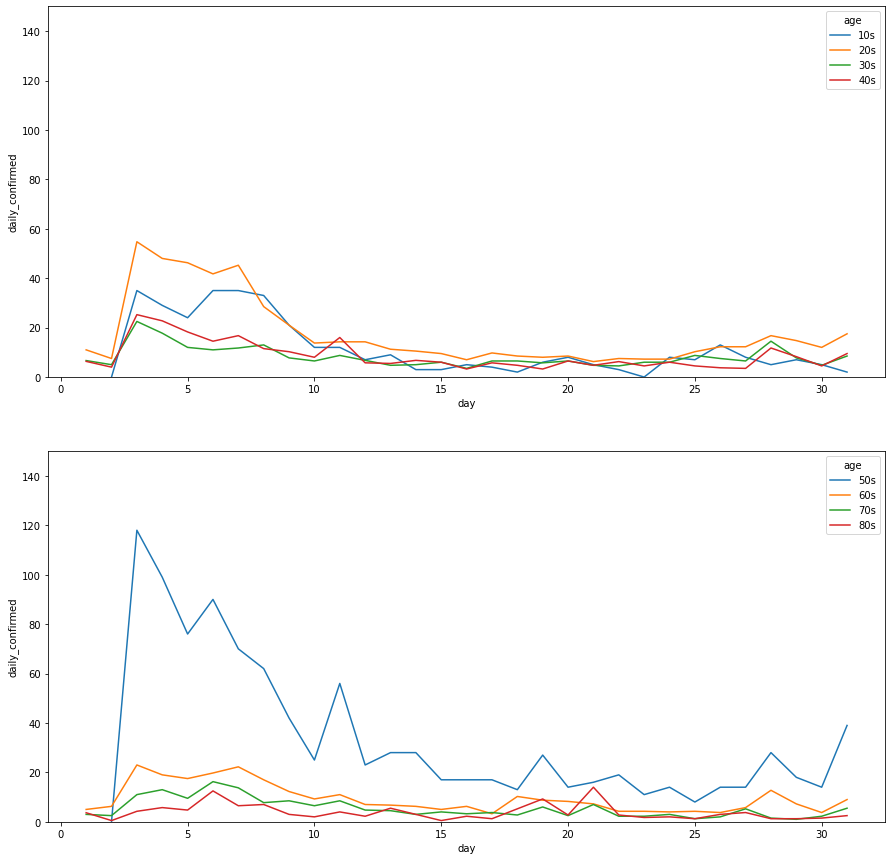

In [20]:
fig, axes = plt.subplots(2, figsize=(15,15))

sns.lineplot(x="day", y="daily_confirmed", hue="age", ci=None, ax=axes[0],
             data=timeage[(timeage['month']== 3) & (timeage['age'] == '10s') | (timeage['age'] == '20s') | (timeage['age'] == '30s') | (timeage['age'] == '40s')])
axes[0].set_ylim(0,150)

sns.lineplot(x="day", y="daily_confirmed", hue="age", ci=None, ax=axes[1],
             data=timeage[(timeage['month']== 3) & (timeage['age'] == '50s') | (timeage['age'] == '60s') | (timeage['age'] == '70s') | (timeage['age'] == '80s')])
axes[1].set_ylim(0,150)

In [159]:
timeage[(timeage['month']== 3) & (timeage['age'] == '20s')]

,date,time,age,confirmed,deceased,year,month,day,daily_confirmed
2,2020-03-02,0,20s,1235,0,2020,3,2,0.0
11,2020-03-03,0,20s,1417,0,2020,3,3,182.0
20,2020-03-04,0,20s,1575,0,2020,3,4,158.0
29,2020-03-05,0,20s,1727,0,2020,3,5,152.0
38,2020-03-06,0,20s,1877,0,2020,3,6,150.0
47,2020-03-07,0,20s,2038,0,2020,3,7,161.0
56,2020-03-08,0,20s,2133,0,2020,3,8,95.0
65,2020-03-09,0,20s,2190,0,2020,3,9,57.0
74,2020-03-10,0,20s,2213,0,2020,3,10,23.0
83,2020-03-11,0,20s,2238,0,2020,3,11,25.0


In [160]:
timeage[(timeage['month']== 3) & (timeage['age'] == '50s')]

,date,time,age,confirmed,deceased,year,month,day,daily_confirmed
5,2020-03-02,0,50s,834,5,2020,3,2,0.0
14,2020-03-03,0,50s,952,5,2020,3,3,118.0
23,2020-03-04,0,50s,1051,5,2020,3,4,99.0
32,2020-03-05,0,50s,1127,5,2020,3,5,76.0
41,2020-03-06,0,50s,1217,5,2020,3,6,90.0
50,2020-03-07,0,50s,1287,5,2020,3,7,70.0
59,2020-03-08,0,50s,1349,5,2020,3,8,62.0
68,2020-03-09,0,50s,1391,5,2020,3,9,42.0
77,2020-03-10,0,50s,1416,5,2020,3,10,25.0
86,2020-03-11,0,50s,1472,6,2020,3,11,56.0
